# Qual o perfil do profissional mais requisitado no mercado de Data Science brasileiro?

Este notebook tem como propósito analisar, de forma exploratória, dados da pesquisa Data Hackers Survey 2019, que coletou informações de Cientistas de Dados brasileiros. A análise é feita de forma a descobrir quais são as características de perfil dos 10% de profissionais que ganham os maiores salários, ou seja, quais são as características do perfil do Cientista de Dados mais requisitados pelo mercado brasileiro.

# Data Prep

Parte reservada para coletar e filtrar os dados de forma a melhor utilizá-los.

In [1]:
# Primeiro, ignorar todos os avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar bibliotecas utilizadas neste notebook
import kaggle
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('talk',font_scale=0.9)
import matplotlib.pyplot as plt
%matplotlib inline

# Baixar e importar dados com biblioteca da Kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('datahackers/pesquisa-data-hackers-2019', path='./', unzip=True)
df = pd.read_csv("datahackers-survey-2019-anonymous-responses.csv")

In [3]:
# Definir colunas relevantes para serem estudadas. 
# Cheque o arquivo data_dictionary.txt para verificar o significado de cada coluna
cols = ["('P1', 'age')", "('P2', 'gender')", "('P3', 'living_in_brasil')", "('P5', 'living_state')", 
        "('P8', 'degreee_level')", "('P10', 'job_situation')", "('P13', 'manager')", "('P16', 'salary_range')",
        "('P17', 'time_experience_data_science')", "('P18', 'time_experience_before')", 
        "('P19', 'is_data_science_professional')", "('P20', 'linear_regression')", "('P20', 'logistic_regression')",
        "('P20', 'glms')", "('P20', 'decision_tree')", "('P20', 'random_forest')", "('P20', 'neural_networks')",
        "('P20', 'bayesian_inference')", "('P20', 'ensemble')", "('P20', 'svms')", "('P20', 'cnns')", "('P20', 'rnns')",
        "('P20', 'hmms')", "('P20', 'gans')", "('P20', 'markov_chains')", "('P20', 'nlp')", 
        "('P20', 'gradient_boosted_machines')", "('P20', 'cluster_analysis')", "('P20', 'survival_analysis')",
        "('P20', 'longitudinal_data_analysis')", "('P20', 'joint analysis')", "('P20', 'no_listed_methods')",
        "('P21', 'sql_')", "('P21', 'r')", "('P21', 'python')", "('P21', 'c_c++_c#')", "('P21', 'dotnet')",
        "('P21', 'java')", "('P21', 'julia')", "('P21', 'sas_stata')", "('P21', 'visual_basic_vba')", "('P21', 'scala')",
        "('P21', 'matlab')", "('P21', 'php')", "('P21', 'no_listed_languages')",
        "('P22', 'most_used_proggraming_languages')", "('P23', 'sql')", "('P23', 'nosql')", "('P23', 'images')", 
        "('P23', 'nlp')", "('P23', 'videos')", "('P23', 'sheets')", "('P23', 'other')", 
        "('P24', 'sql')", "('P24', 'nosql')", "('P24', 'imagens')", "('P24', 'nlp')", "('P24', 'vídeos')",
        "('P24', 'planilhas')", "('P24', 'other')", "('P25', 'aws')", "('P25', 'gcp')", "('P25', 'azure')", "('P25', 'ibm')",
        "('P25', 'on_premise_servers')", "('P25', 'cloud_própria')", "('P25', 'other')", "('P26', 'mysql')", 
        "('P26', 'oracle')", "('P26', 'sql_server')", "('P26', 'aurora')", "('P26', 'dynamodb')", "('P26', 'coachdb')", 
        "('P26', 'cassandra')", "('P26', 'mongodb')", "('P26', 'mariadb')", "('P26', 'datomic')", "('P26', 's3')",
        "('P26', 'postgresql')", "('P26', 'elaticsearch')", "('P26', 'db2')", "('P26', 'ms_access')", "('P26', 'sqlite')",
        "('P26', 'sybase')", "('P26', 'firebase')", "('P26', 'vertica')", "('P26', 'redis')", "('P26', 'neo4j')",
        "('P26', 'google_bigtable')", "('P26', 'hbase')", "('P26', 'other')", "('P27', 'microsoft_powerbi')",
        "('P27', 'qlik_view_qlik_sense')", "('P27', 'tableau')", "('P27', 'metabase')", "('P27', 'superset')",
        "('P27', 'redash')", "('P27', 'microstrategy')", "('P27', 'ibm_analytics_cognos')", 
        "('P27', 'sap_business_objects')", "('P27', 'oracle_business_intelligence')", "('P27', 'birst')", 
        "('P27', 'looker')", "('P27', 'google_data_studio')", "('P27', 'only_excel_gsheets')", 
        "('P27', 'no_bi_tool_at_work')", "('P27', 'other')", "('P28', 'sql_&_stored_procedures')", 
        "('P28', 'apache_airflow')", "('P28', 'luigi')", "('P28', 'aws_glue')", "('P28', 'talend')",
        "('P28', 'pentaho')", "('P28', 'alteryx')", "('P28', 'oracle_data_integrator')", "('P28', 'ibm_data_stage')",
        "('P28', 'sap_bw_etl')", "('P28', 'siss_sql_server_integration_services')", "('P28', 'other')", 
        "('P29', 'have_data_warehouse')", "('P30', 'google_bigquery')", "('P30', 'aws_redshift')", "('P30', 'snowflake')", 
        "('P30', 'oracle')", "('P30', 'postgres_mysql')", "('P30', 'ibm')", "('P30', 'teradata')", 
        "('P30', 'microsoft_azure')", "('P30', 'do_not_know')", "('P30', 'other')", "('P33', 'telegram_groups')",
        "('P33', 'whatsapp_groups')", "('P33', 'youtube_channels')", "('P33', 'other_brasilian_blogs')", 
        "('P33', 'other_slack_channels')", "('P33', 'twitter')", "('P33', 'abroad_blogs')", "('P33', 'abroad_podcasts')", 
        "('P33', 'meetups_and_events')", "('P33', 'only_data_hackers')", "('P33', 'other')", "('P34', 'udacity')",
        "('P34', 'coursera')", "('P34', 'udemy')", "('P34', 'height')", "('P34', 'edx')", "('P34', 'data_camp')",
        "('P34', 'data_quest')", "('P34', 'kaggle_learn')", "('P34', 'online_courses')", "('P34', 'other')",
        "('P35', 'data_science_plataforms_preference')", "('P35', 'other')", "('D1', 'living_macroregion')",
        "('D3', 'anonymized_degree_area')", "('D4', 'anonymized_market_sector')", "('D5', 'anonymized_manager_level')",
        "('D6', 'anonymized_role')"]

# Redefinir dataframe
df = df[cols]

In [4]:
# Transformar dados categóricos de salários em dados numéricos, considerando a média 
# trazida pelos dados categóricos
df["Sal"] = df["('P16', 'salary_range')"].map({'de R$ 1.001/mês a R$ 2.000/mês': 1500,
                                  'de R$ 2.001/mês a R$ 3000/mês': 2500,
                                  'de R$ 4.001/mês a R$ 6.000/mês': 5000,
                                  'de R$ 6.001/mês a R$ 8.000/mês': 7000,
                                  'de R$ 3.001/mês a R$ 4.000/mês': 3500,
                                  'de R$ 8.001/mês a R$ 12.000/mês': 10000,
                                   'de R$ 12.001/mês a R$ 16.000/mês': 14000,
                                  'Menos de R$ 1.000/mês':1000,
                                   'de R$ 16.001/mês a R$ 20.000/mês': 18000,
                                  'de R$ 20.001/mês a R$ 25.000/mês':22500,
                                  'Acima de R$ 25.001/mês':25000,
                                  np.nan: np.nan,})

# Análise Geral

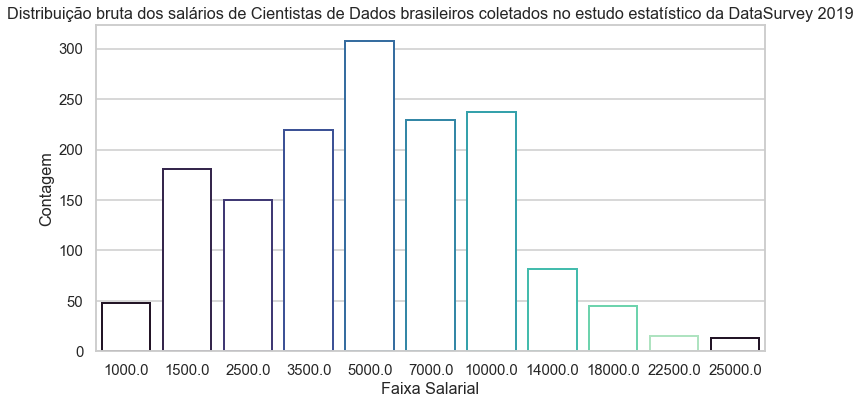

In [5]:
fig = plt.figure(figsize=(12,6))
sns.countplot(df['Sal'], color="white", lw=2,
              edgecolor=sns.color_palette("mako", 10))
plt.title("Distribuição bruta dos salários de Cientistas de Dados brasileiros coletados no estudo estatístico da DataSurvey 2019")
plt.xlabel("Faixa Salarial")
plt.ylabel("Contagem")
plt.show()

In [6]:
print("Quantos dados há na pesquisa? \nR: {:.0f}".format(df["Sal"].count()))
print("Qual o salário médio de quem respondeu? \nR: R${:.2f}".format(np.mean(df["Sal"])))
print("Qual o salário mediano ? \nR: R${:.2f}".format(np.median(df["Sal"].dropna())))
print("Qual o desvio padrão da medida? \nR: R${:.2f}".format(np.std(df["Sal"])))

Quantos dados há na pesquisa? 
R: 1527
Qual o salário médio de quem respondeu? 
R: R$6283.24
Qual o salário mediano ? 
R: R$5000.00
Qual o desvio padrão da medida? 
R: R$4633.44


# Best 10%

In [7]:
df_best = df.sort_values(by="Sal", ascending=False).head(int(len(df)*0.1))
df_best = df_best[
    (df_best["('P19', 'is_data_science_professional')"]==1) &
    (df_best["('P3', 'living_in_brasil')"]==1)
]

Qual o salário médio dos melhores profissionais? 
R: R$15795.45
Qual o salário mediano  dos melhores profissionais? 
R: R$14000.00
Qual o desvio padrão da medida? 
R: R$3790.12


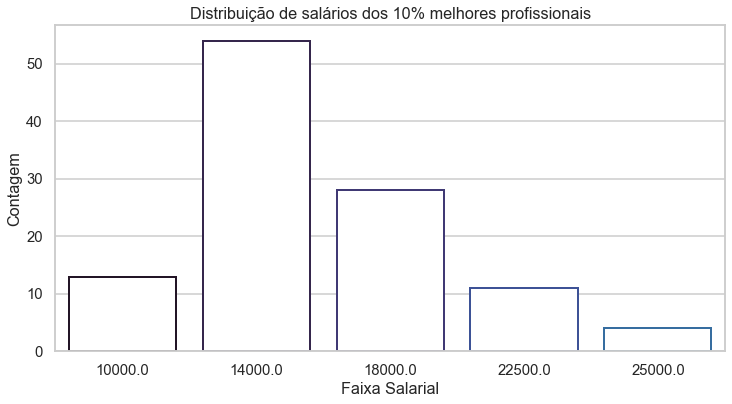

In [8]:
print("Qual o salário médio dos melhores profissionais? \nR: R${:.2f}".format(np.average(df_best["Sal"])))
print("Qual o salário mediano  dos melhores profissionais? \nR: R${:.2f}".format(np.median(df_best["Sal"])))
print("Qual o desvio padrão da medida? \nR: R${:.2f}".format(np.std(df_best["Sal"])))


fig = plt.figure(figsize=(12,6))
sns.countplot(df_best['Sal'], color="white", lw=2,
              edgecolor=sns.color_palette("mako", 10))
plt.title("Distribuição de salários dos 10% melhores profissionais")
plt.xlabel("Faixa Salarial")
plt.ylabel("Contagem")
plt.show()

In [9]:
print("Qual a idade média dos melhores profissionais? R: {:.0f}".format(
    df_best["('P1', 'age')"].mean()
))
print("A idade varia tipicamente entre {:.0f} e {:.0f}".format(
    df_best["('P1', 'age')"].mean()-df_best["('P1', 'age')"].std(),
    df_best["('P1', 'age')"].mean()+df_best["('P1', 'age')"].std()
))

Qual a idade média dos melhores profissionais? R: 35
A idade varia tipicamente entre 29 e 42


In [10]:
print("Qual a distribuição de gênero dos melhores profissionais?")
df_best["('P2', 'gender')"].value_counts()

Qual a distribuição de gênero dos melhores profissionais?


Masculino    94
Feminino     16
Name: ('P2', 'gender'), dtype: int64

In [11]:
print("\nQual a distribuição de UF?")
print(df_best["('P5', 'living_state')"].value_counts())

print("\nQual o degree médio?")
print(df_best["('P8', 'degreee_level')"].value_counts())


Qual a distribuição de UF?
São Paulo (SP)            62
Minas Gerais (MG)         12
Rio de Janeiro (RJ)       10
Paraná (PR)                5
Rio Grande do Sul (RS)     4
Espírito Santo (ES)        2
Name: ('P5', 'living_state'), dtype: int64

Qual o degree médio?
Pós-graduação                 51
Graduação/Bacharelado         23
Mestrado                      18
Doutorado ou Phd              13
Estudante de Graduação         3
Não tenho graduação formal     2
Name: ('P8', 'degreee_level'), dtype: int64


In [12]:
print("\nQual o job situation?")
df_best["('P10', 'job_situation')"].value_counts()


Qual o job situation?


Empregado (CTL)                     62
Empreendedor ou Empregado (CNPJ)    35
Servidor Público                    12
Prefiro não dizer                    1
Name: ('P10', 'job_situation'), dtype: int64

In [13]:
print("\n Essas pessoas ocupam posição de liderança?")
df_best["('P13', 'manager')"].value_counts()


 Essas pessoas ocupam posição de liderança?


1.0    59
0.0    51
Name: ('P13', 'manager'), dtype: int64

In [14]:
print("\n Qual a faixa salarial mais comum?")
df_best["('P16', 'salary_range')"].value_counts()


 Qual a faixa salarial mais comum?


de R$ 12.001/mês a R$ 16.000/mês    54
de R$ 16.001/mês a R$ 20.000/mês    28
de R$ 8.001/mês a R$ 12.000/mês     13
de R$ 20.001/mês a R$ 25.000/mês    11
Acima de R$ 25.001/mês               4
Name: ('P16', 'salary_range'), dtype: int64

In [15]:
print("\n Qual o tempo de experiência?")
df_best["('P17', 'time_experience_data_science')"].value_counts()


 Qual o tempo de experiência?


Mais de 10 anos                           33
de 6 a 10 anos                            30
de 4 a 5 anos                             23
de 2 a 3 anos                             11
de 1 a 2 anos                              9
Menos de 1 ano                             3
Não tenho experiência na área de dados     1
Name: ('P17', 'time_experience_data_science'), dtype: int64

In [16]:
print("\n Qual o tempo de experiência?")
df_best["('P18', 'time_experience_before')"].value_counts()


 Qual o tempo de experiência?


Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados    35
Mais de 10 anos                                                                                            21
de 6 a 10 anos                                                                                             15
Menos de 1 ano                                                                                             12
de 1 a 2 anos                                                                                              10
de 4 a 5 anos                                                                                               9
de 2 a 3 anos                                                                                               8
Name: ('P18', 'time_experience_before'), dtype: int64

In [17]:
print("\n Qual as metodologias mais utilizadas?")
tech_best = [col for col in df_best if col.startswith("('P20") ]
percs = [df_best[tech_best][col].sum() /len(df_best)*100 for col in df_best[tech_best].columns]

df_best_tech = pd.DataFrame()
df_best_tech["cols"]=df_best[tech_best].columns
df_best_tech["percentage"]=percs

df_best_tech.sort_values(by="percentage", ascending=False).head(5)


 Qual as metodologias mais utilizadas?


,cols,percentage
0,"('P20', 'linear_regression')",76.363636
3,"('P20', 'decision_tree')",70.909091
1,"('P20', 'logistic_regression')",64.545455
16,"('P20', 'cluster_analysis')",62.727273
4,"('P20', 'random_forest')",58.181818


In [18]:
print("\n Quais as linguagens mais utilizadas?")
lang_best = [col for col in df_best if col.startswith("('P21") ]
percs = [df_best[lang_best][col].sum() /len(df_best)*100 for col in df_best[lang_best].columns]

df_best_lang = pd.DataFrame()
df_best_lang["cols"]=df_best[lang_best].columns
df_best_lang["percentage"]=percs

df_best_lang.sort_values(by="percentage", ascending=False).head(5)


 Quais as linguagens mais utilizadas?


,cols,percentage
2,"('P21', 'python')",87.272727
0,"('P21', 'sql_')",82.727273
1,"('P21', 'r')",44.545455
8,"('P21', 'visual_basic_vba')",12.727273
5,"('P21', 'java')",10.909091


In [19]:
print("\n Quais as fontes de dados mais utilizadas?")
source_best = [col for col in df_best if col.startswith("('P23") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False).head(5)


 Quais as fontes de dados mais utilizadas?


,cols,percentage
0,"('P23', 'sql')",97.272727
5,"('P23', 'sheets')",86.363636
1,"('P23', 'nosql')",60.000000
3,"('P23', 'nlp')",47.272727
2,"('P23', 'images')",27.272727


In [20]:
print("\n Quais as clouds mais utilizadas?")
source_best = [col for col in df_best if col.startswith("('P25") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False).head(5)


 Quais as clouds mais utilizadas?


,cols,percentage
0,"('P25', 'aws')",47.272727
1,"('P25', 'gcp')",30.909091
2,"('P25', 'azure')",30.909091
4,"('P25', 'on_premise_servers')",25.454545
5,"('P25', 'cloud_própria')",17.272727


In [21]:
print("\n Quais os DBs mais utilizadas?")
source_best = [col for col in df_best if col.startswith("('P26") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False).head(5)


 Quais os DBs mais utilizadas?


,cols,percentage
2,"('P26', 'sql_server')",46.363636
0,"('P26', 'mysql')",40.000000
11,"('P26', 'postgresql')",39.090909
1,"('P26', 'oracle')",38.181818
7,"('P26', 'mongodb')",32.727273


In [22]:
print("\n Quais as ferramentas de BI mais utilizadas?")
source_best = [col for col in df_best if col.startswith("('P27") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False).head(5)


 Quais as ferramentas de BI mais utilizadas?


,cols,percentage
0,"('P27', 'microsoft_powerbi')",49.090909
2,"('P27', 'tableau')",30.909091
3,"('P27', 'metabase')",20.000000
1,"('P27', 'qlik_view_qlik_sense')",14.545455
14,"('P27', 'no_bi_tool_at_work')",13.636364


In [23]:
print("\n Quais os ETLs mais utilizados?")
source_best = [col for col in df_best if col.startswith("('P28") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False).head(5)


 Quais os ETLs mais utilizados?


,cols,percentage
0,"('P28', 'sql_&_stored_procedures')",36.363636
11,"('P28', 'other')",25.454545
1,"('P28', 'apache_airflow')",24.545455
5,"('P28', 'pentaho')",18.181818
10,"('P28', 'siss_sql_server_integration_services')",16.363636


In [24]:
print("\n Quais os Data Warehouses mais utilizados?")
source_best = [col for col in df_best if col.startswith("('P30") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False).head(5)


 Quais os Data Warehouses mais utilizados?


,cols,percentage
7,"('P30', 'microsoft_azure')",16.363636
4,"('P30', 'postgres_mysql')",13.636364
1,"('P30', 'aws_redshift')",12.727273
3,"('P30', 'oracle')",11.818182
0,"('P30', 'google_bigquery')",7.272727


In [25]:
print("\n Quais as formas mais comuns de se atualizar sobre dados?")
source_best = [col for col in df_best if col.startswith("('P33") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False).head(5)


 Quais as formas mais comuns de se atualizar sobre dados?


,cols,percentage
6,"('P33', 'abroad_blogs')",59.090909
8,"('P33', 'meetups_and_events')",54.545455
2,"('P33', 'youtube_channels')",43.636364
7,"('P33', 'abroad_podcasts')",37.272727
3,"('P33', 'other_brasilian_blogs')",30.909091


In [26]:
print("\n Quais as plataformas mais utilizadas de cursos de DS?")
source_best = [col for col in df_best if col.startswith("('P34") ]
percs = [df_best[source_best][col].sum() /len(df_best)*100 for col in df_best[source_best].columns]

df_source_best = pd.DataFrame()
df_source_best["cols"]=df_best[source_best].columns
df_source_best["percentage"]=percs

df_source_best.sort_values(by="percentage", ascending=False)


 Quais as plataformas mais utilizadas de cursos de DS?


,cols,percentage
1,"('P34', 'coursera')",66.363636
2,"('P34', 'udemy')",50.000000
0,"('P34', 'udacity')",36.363636
4,"('P34', 'edx')",30.000000
5,"('P34', 'data_camp')",26.363636
7,"('P34', 'kaggle_learn')",19.090909
3,"('P34', 'height')",12.727273
9,"('P34', 'other')",10.909091
6,"('P34', 'data_quest')",4.545455
8,"('P34', 'online_courses')",3.636364


O melhor profissional da Ciência de Dados hoje ganha em média cerca de R$16.000, tem entre 29 e 42 anos e tem 85% de chance de ser homem. Possui 65% de chance de morar em São Paulo. Tem 46% de chance de ter pós-graduação, 21% de chance de ser graduado, 16% de ter mestrado, e 12% de chance de ter doutorado. Possui 56% de chance de ser CLT, 32% de chance de ser pessoa jurídica, e 11% de chance de ser servidor público. 54% dessas pessoas ocupam posição de liderança.
\
\
30% dessas pessoas possuem mais de 10 anos de experiência, 27% possuem de 6 a 10 anos, 21% de 4 a 5 anos, 10% de 2 a 3 anos, 8% possuem entre 1 e 2 anos de experiência, e 5% menos de 1 ano de experiência.
\
\
Para estes profissionais, 76% utilizam regressão linear, 71% utilizam árvores de decisão, 64% utilizam regressão logística, 62% usam análise de cluster, e 58% utilizam florestas aleatórias. 87% desses profissionais utilizam Python, 83% utilizam SQL, 45% utilizam R, 13% utilizam VBA, e 11% usam Java.
\
\
As fontes de dados mais utilizadas são SQL (97%), Sheets (86%), NoSQL (60%), NLP (47%), e imagens (27%). As clouds mais utilizadas são AWS (47%), GCP (31%) e Azure (31%). As DBs mais utilizadas são SQL Server (46%), MySQL (40%), PostgreSQL (39%) e Oracle (38%). As ferramentas de BI mais utilizadas são Power BI (49%), Tableau (31%), MetaBase (20%) e Qlik (15%).
\
\
Desses profissionais, 59% se atualizam sobre sua área através de blogs estrangeiros, 31% através de blogs nacionais, 54% através de eventos ou encontros com outros profissionais da área, 44% através de canais no YouTube, e 37% via podcasts. \
As plataformas de curso mais utilizadas são Coursera (66%), Udemy (50%), Udacity (36%), EDX (30%), e Data Camp (26%).